In [1]:
from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
# load iris 
iris = load_iris()

In [3]:
# dataset shape
iris.data.shape

(150, 4)

In [4]:
# features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.data[1:5]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
# labels
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# build model, decision tree
clf = tree.DecisionTreeClassifier()

In [9]:
# trainning model
clf = clf.fit(iris.data, iris.target)

In [10]:
# classifier
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
# visulization
import graphviz 

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  

In [13]:
graph = graphviz.Source(dot_data)

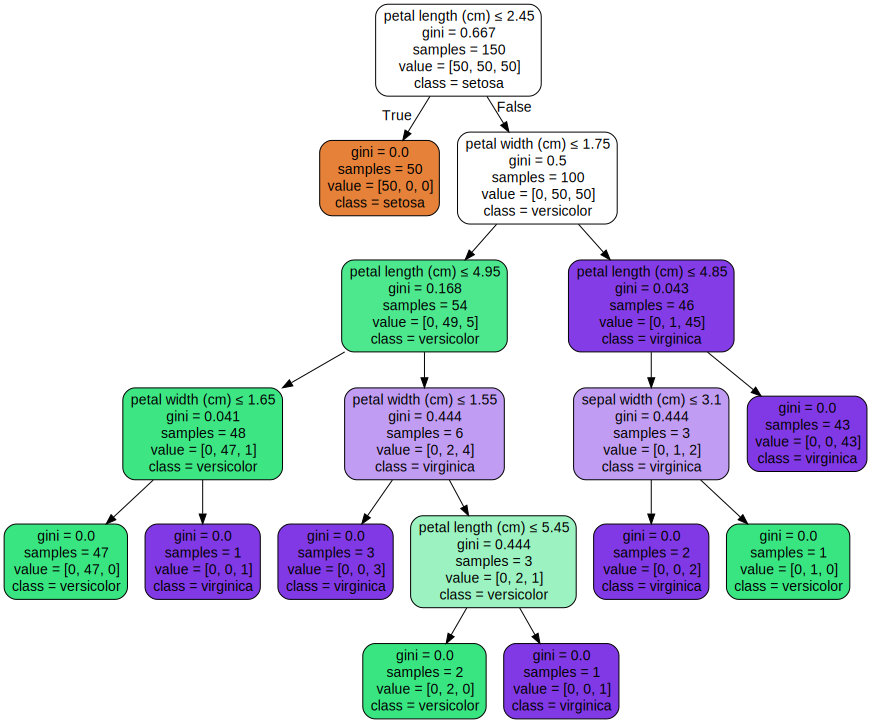

In [14]:
graph

In [15]:
# save model
from sklearn.externals import joblib

In [16]:
joblib.dump(clf, "clf.m")

['clf.m']

In [17]:
# load model
clf2 = joblib.load("clf.m")

In [18]:
clf2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
# predict
clf2.predict(iris.data[:3, :])

array([0, 0, 0])

In [20]:
clf2.predict_proba(iris.data[:3, :])

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [21]:
# random forest
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier()

In [23]:
rf.fit(iris.data, iris.target)

/Users/meizu/Work/py_env/my_scikit_learn/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
rf.predict(iris.data[100:109,:])

array([2, 2, 2, 2, 2, 2, 1, 2, 2])

In [25]:
iris.target[100:109]

array([2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
# splitting of train and test
# n-cross validataion
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import ExtraTreesClassifier

In [27]:
# prepare dataset
X, y = make_blobs(n_samples=10000, n_features=10, centers=100, random_state=1234L)

In [28]:
X[:1]

array([[ 10.20003223,  -6.81561064, -10.49245073,   1.64815098,
          1.37877155,   5.36446861,   7.10949454,   8.44537867,
          0.31902792,  -3.48694784]])

In [29]:
y[:1]

array([74])

In [30]:
# rf testing
rf_test = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=1234L)
scores = cross_val_score(rf_test, X, y)

/Users/meizu/Work/py_env/my_scikit_learn/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [31]:
scores.mean()

0.9996969696969696

In [32]:
# Extra trees testing
et_test = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=1234L)
scores = cross_val_score(et_test, X, y)

In [33]:
scores.mean()

0.9999019607843138

In [34]:
# decision tree testing
dt_test = tree.DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=1234L)
scores = cross_val_score(dt_test, X, y)

In [35]:
scores.mean()

0.9757397504456328